## **CREDIT RISK ANALYSIS**

JAVIER ALFREDO BRAVO BERNAL

TECNOLOGICO DE MONTERREY



# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

In [ ]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargamos los datos:

DIR ="/content/drive/MyDrive/Colab Notebooks/MNA/Inteligencia Artificial y aprendizaje automatico/Actividad 4 y 5 "
os.chdir(DIR)
df = pd.read_csv("SouthGermanCredit.asc",sep=' ')
print(df.shape)
df.head(3)

(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [ ]:
# Renombra los nombres de las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************
translated_columns = ['status','duration','credit_history','purpose','amount','savings','employment_duration','installment_rate','personal_status_sex','other_debtors','present_residence','property','age','other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk']
df.columns = translated_columns
#translated_columns

  # NOTA: Tanto aquí como en lo sucesivo, "None" puede indicar una o varias líneas de código.

# *********** Aquí termina la sección de agregar código *************

df.head().T

,0,1,2,3,4
status,1,1,2,1,1
duration,18,9,12,12,12
credit_history,4,4,2,4,4
purpose,2,0,9,0,0
amount,1049,2799,841,2122,2171
savings,1,1,2,1,1
employment_duration,2,3,4,3,3
installment_rate,4,2,2,3,4
personal_status_sex,2,3,2,3,3
other_debtors,1,1,1,1,1


In [ ]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0. Realiza a continuación una transformación para que la
# clase negativa (buen cliente) quede ahora con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.


mapping = {1: 0, 0: 1}
df['credit_risk'] = df['credit_risk'].replace(mapping)


print(df['credit_risk'].value_counts())

0    700
1    300
Name: credit_risk, dtype: int64


In [ ]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:



X=df.drop(columns=['credit_risk'])
y=df['credit_risk']
Xtrain_temp, Xtrain, ytrain_temp, ytrain = train_test_split(X, y, test_size=0.7, random_state=42)
Xtest, Xval, ytest, yval = train_test_split(Xtrain_temp, ytrain_temp, test_size=0.5, random_state=42)



# Mostremos las dimensiones de la partición generada:
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(700, 20) (700,)
(150, 20) (150,)
(150, 20) (150,)


In [ ]:
for col in df : print(df[col].value_counts().T, "\n\n")

4    394
1    274
2    269
3     63
Name: status, dtype: int64 


24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
45      5
39      5
7       5
14      4
13      4
28      3
33      3
54      2
22      2
16      2
5       1
47      1
26      1
72      1
40      1
Name: duration, dtype: int64 


2    530
4    293
3     88
1     49
0     40
Name: credit_history, dtype: int64 


3     280
0     234
2     181
1     103
9      97
6      50
5      22
10     12
4      12
8       9
Name: purpose, dtype: int64 


1258     3
1275     3
1393     3
1262     3
1478     3
        ..
1346     1
10477    1
2924     1
1961     1
6350     1
Name: amount, Length: 923, dtype: int64 


1    603
5    183
2    103
3     63
4     48
Name: savings, dtype: int64 


3    339
5    253
4    174
2    172
1     62
Name: employment_duration, dtype: int64 


4    476
2    231
3    157
1  

### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles que tiene.**


### **Variables Categóricas:**

1. status
                                               
 1 : no checking account                       
 2 : ... < 0 DM                                
 3 : 0<= ... < 200 DM                          
 4 : ... >= 200 DM / salary for at least 1 year

el status del deudor en su cuenta de cheques
2.  credit_history`
                                                
 0 : delay in paying off in the past            
 1 : critical account/other credits elsewhere   
 2 : no credits taken/all credits paid back duly
 3 : existing credits paid back duly till now   
 4 : all credits at this bank paid back duly    

historial de credito del deudor

3.  purpose`
                        
 0 : others             
 1 : car (new)          
 2 : car (used)         
 3 : furniture/equipment
 4 : radio/television   
 5 : domestic appliances
 6 : repairs            
 7 : education          
 8 : vacation           
 9 : retraining         
 10 : business

proposito del credito

4.   savings`
                               
 1 : unknown/no savings account
 2 : ... <  100 DM             
 3 : 100 <= ... <  500 DM      
 4 : 500 <= ... < 1000 DM      
 5 : ... >= 1000 DM  

 cantidad de dinero en su cuenta de ahorros          

5.   employment_duration`
                     
 1 : unemployed      
 2 : < 1 yr          
 3 : 1 <= ... < 4 yrs
 4 : 4 <= ... < 7 yrs
 5 : >= 7 yrs

 duracion del empleo     

6.  installment_rate`
                   
 1 : >= 35         
 2 : 25 <= ... < 35
 3 : 20 <= ... < 25
 4 : < 20

 porcentaje proporcional de las mensualidades del credito con su ingreso mensual.          

7.   personal_status_sex`
                                         
 1 : male : divorced/separated           
 2 : female : non-single or male : single
 3 : male : married/widowed              
 4 : female : single

 genero y estatus civil      

8.  other_debtors`
                 
 1 : none        
 2 : co-applicant
 3 : guarantor   

codeudor o garante para el credito

9.   present_residence`
                     
 1 : < 1 yr          
 2 : 1 <= ... < 4 yrs
 3 : 4 <= ... < 7 yrs
 4 : >= 7 yrs

 años que esta viviendo en la misma residencia.        

10.  property`
                                              
 1 : unknown / no property                    
 2 : car or other                             
 3 : building soc. savings agr./life insurance
 4 : real estate                              

bienes del deudor.

11.   other_installment_plans`
           
 1 : bank  
 2 : stores
 3 : none

 otros pagos mensuales que tiene el deudor  

12.   housing`
             
 1 : for free
 2 : rent    
 3 : own     

tipo de vivienda que tiene.

13.   number_credits`
         
 1 : 1   
 2 : 2-3
 3 : 4-5
 4 : >= 6

 numero de creditos

14.   job`
                                               
 1 : unemployed/unskilled - non-resident       
 2 : unskilled - resident                      
 3 : skilled employee/official                 
 4 : manager/self-empl./highly qualif. employee

 tipo de empleo del deudor.

15.   people_liable`
              
 1 : 3 or more
 2 : 0 to 2   

dependientes del deudor.

16.  telephone`
                              
 1 : no                       
 2 : yes (under customer name)

 linea de telefono a nombre del deudor

17.  foreign_worker`
        
 1 : yes
 2 : no

 trabajador extranjero.

18.   credit_risk`
         
 0 : bad
 1 : good

 riesgo de credito


### **Variables Numéricas:**

1.   duration`

 duracion del credito en meses

2.   amount

monto del credito

3.  age

edad del solicitante


### ++++++++ Termina la sección de agregar texto. +++++++++++

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.



In [ ]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

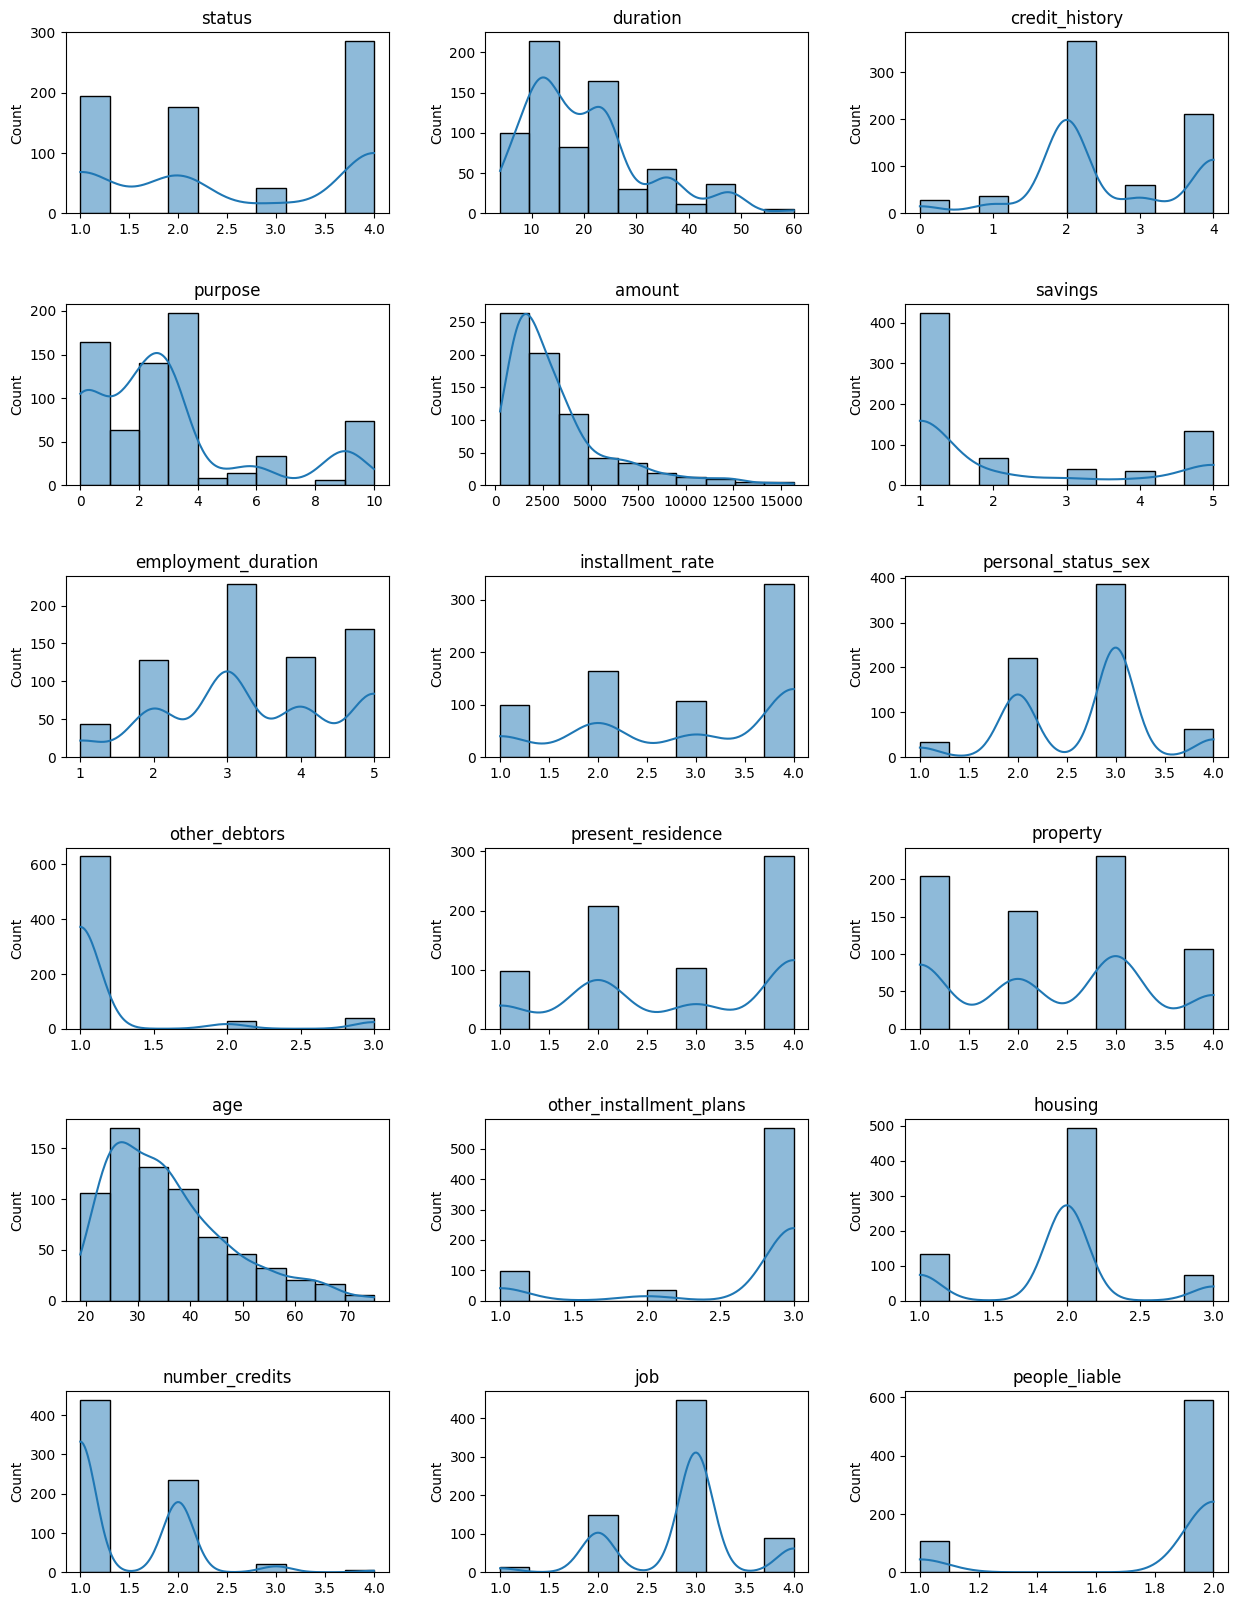

In [ ]:

 # Puedes incluir a continuación todas las celdas de código que requieras....

fig, axes = plt.subplots(6,3, figsize=(15,20))
plt.subplots_adjust(wspace=0.3,hspace=0.5)
axes = axes.ravel()
for col, ax in zip(Xtrain, axes):
  sns.histplot(x=Xtrain[col], ax=ax,bins=10, kde=True) # ---> Seaborn
  df_mean=Xtrain[col].mean()
  df_median= Xtrain[col].median()
  ax.set(title=f'{col}',xlabel=None)



<Axes: >

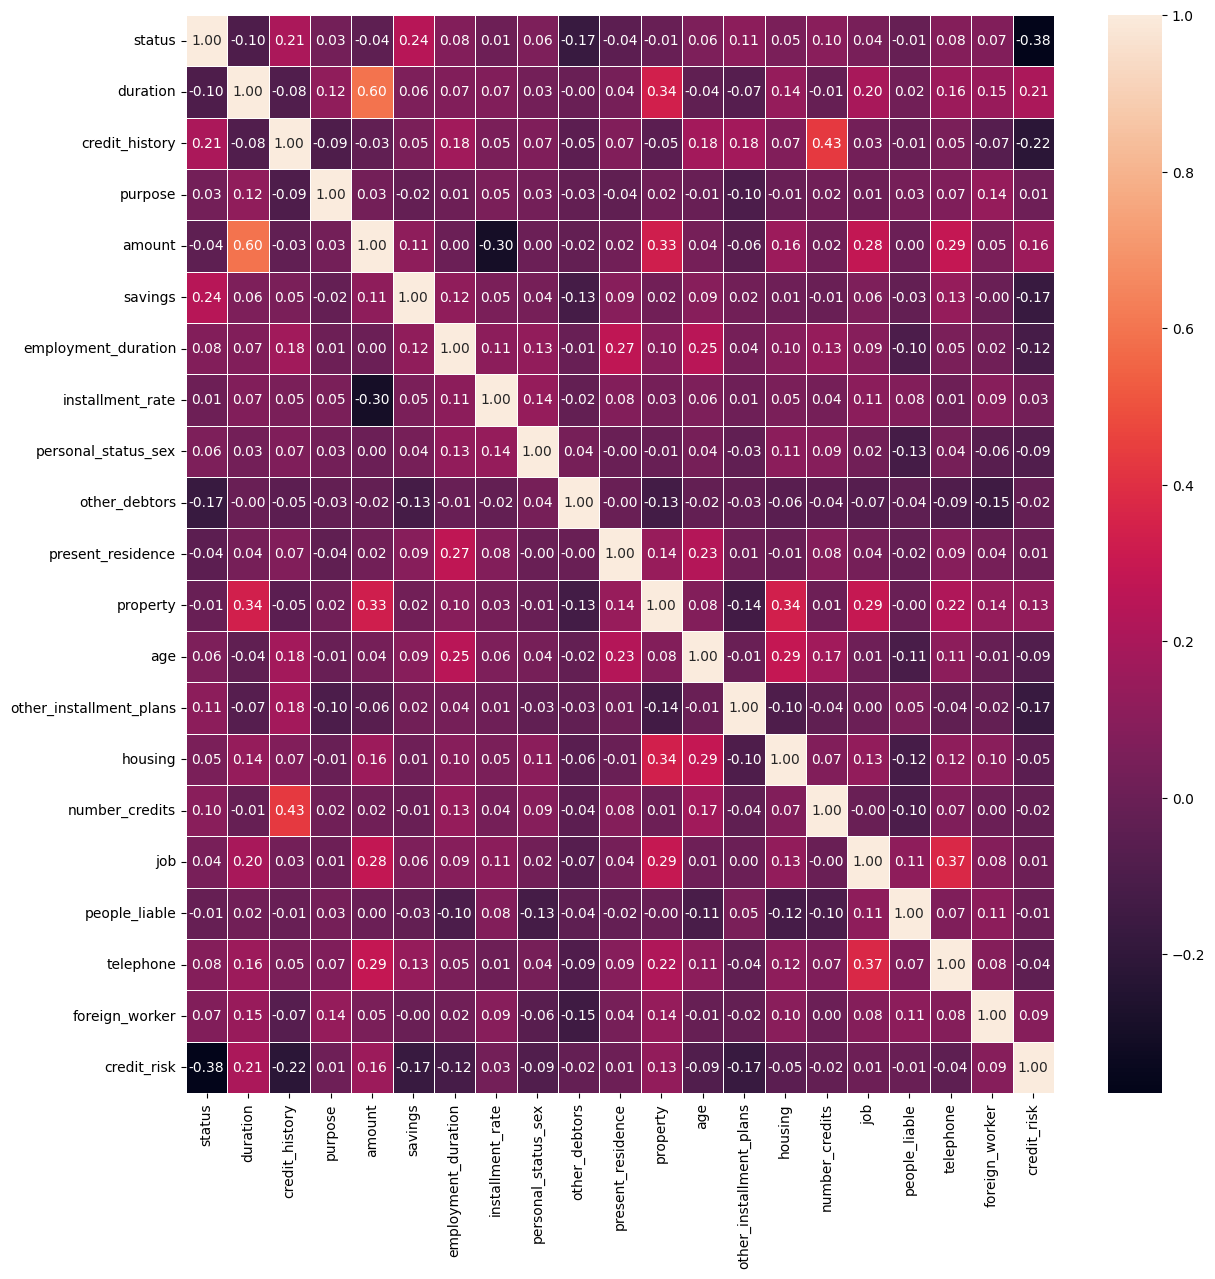

In [ ]:
corr = pd.concat([Xtrain, ytrain], axis=1)
correlation_matrix = corr.corr(method='pearson')
plt.figure(figsize=(14,14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)

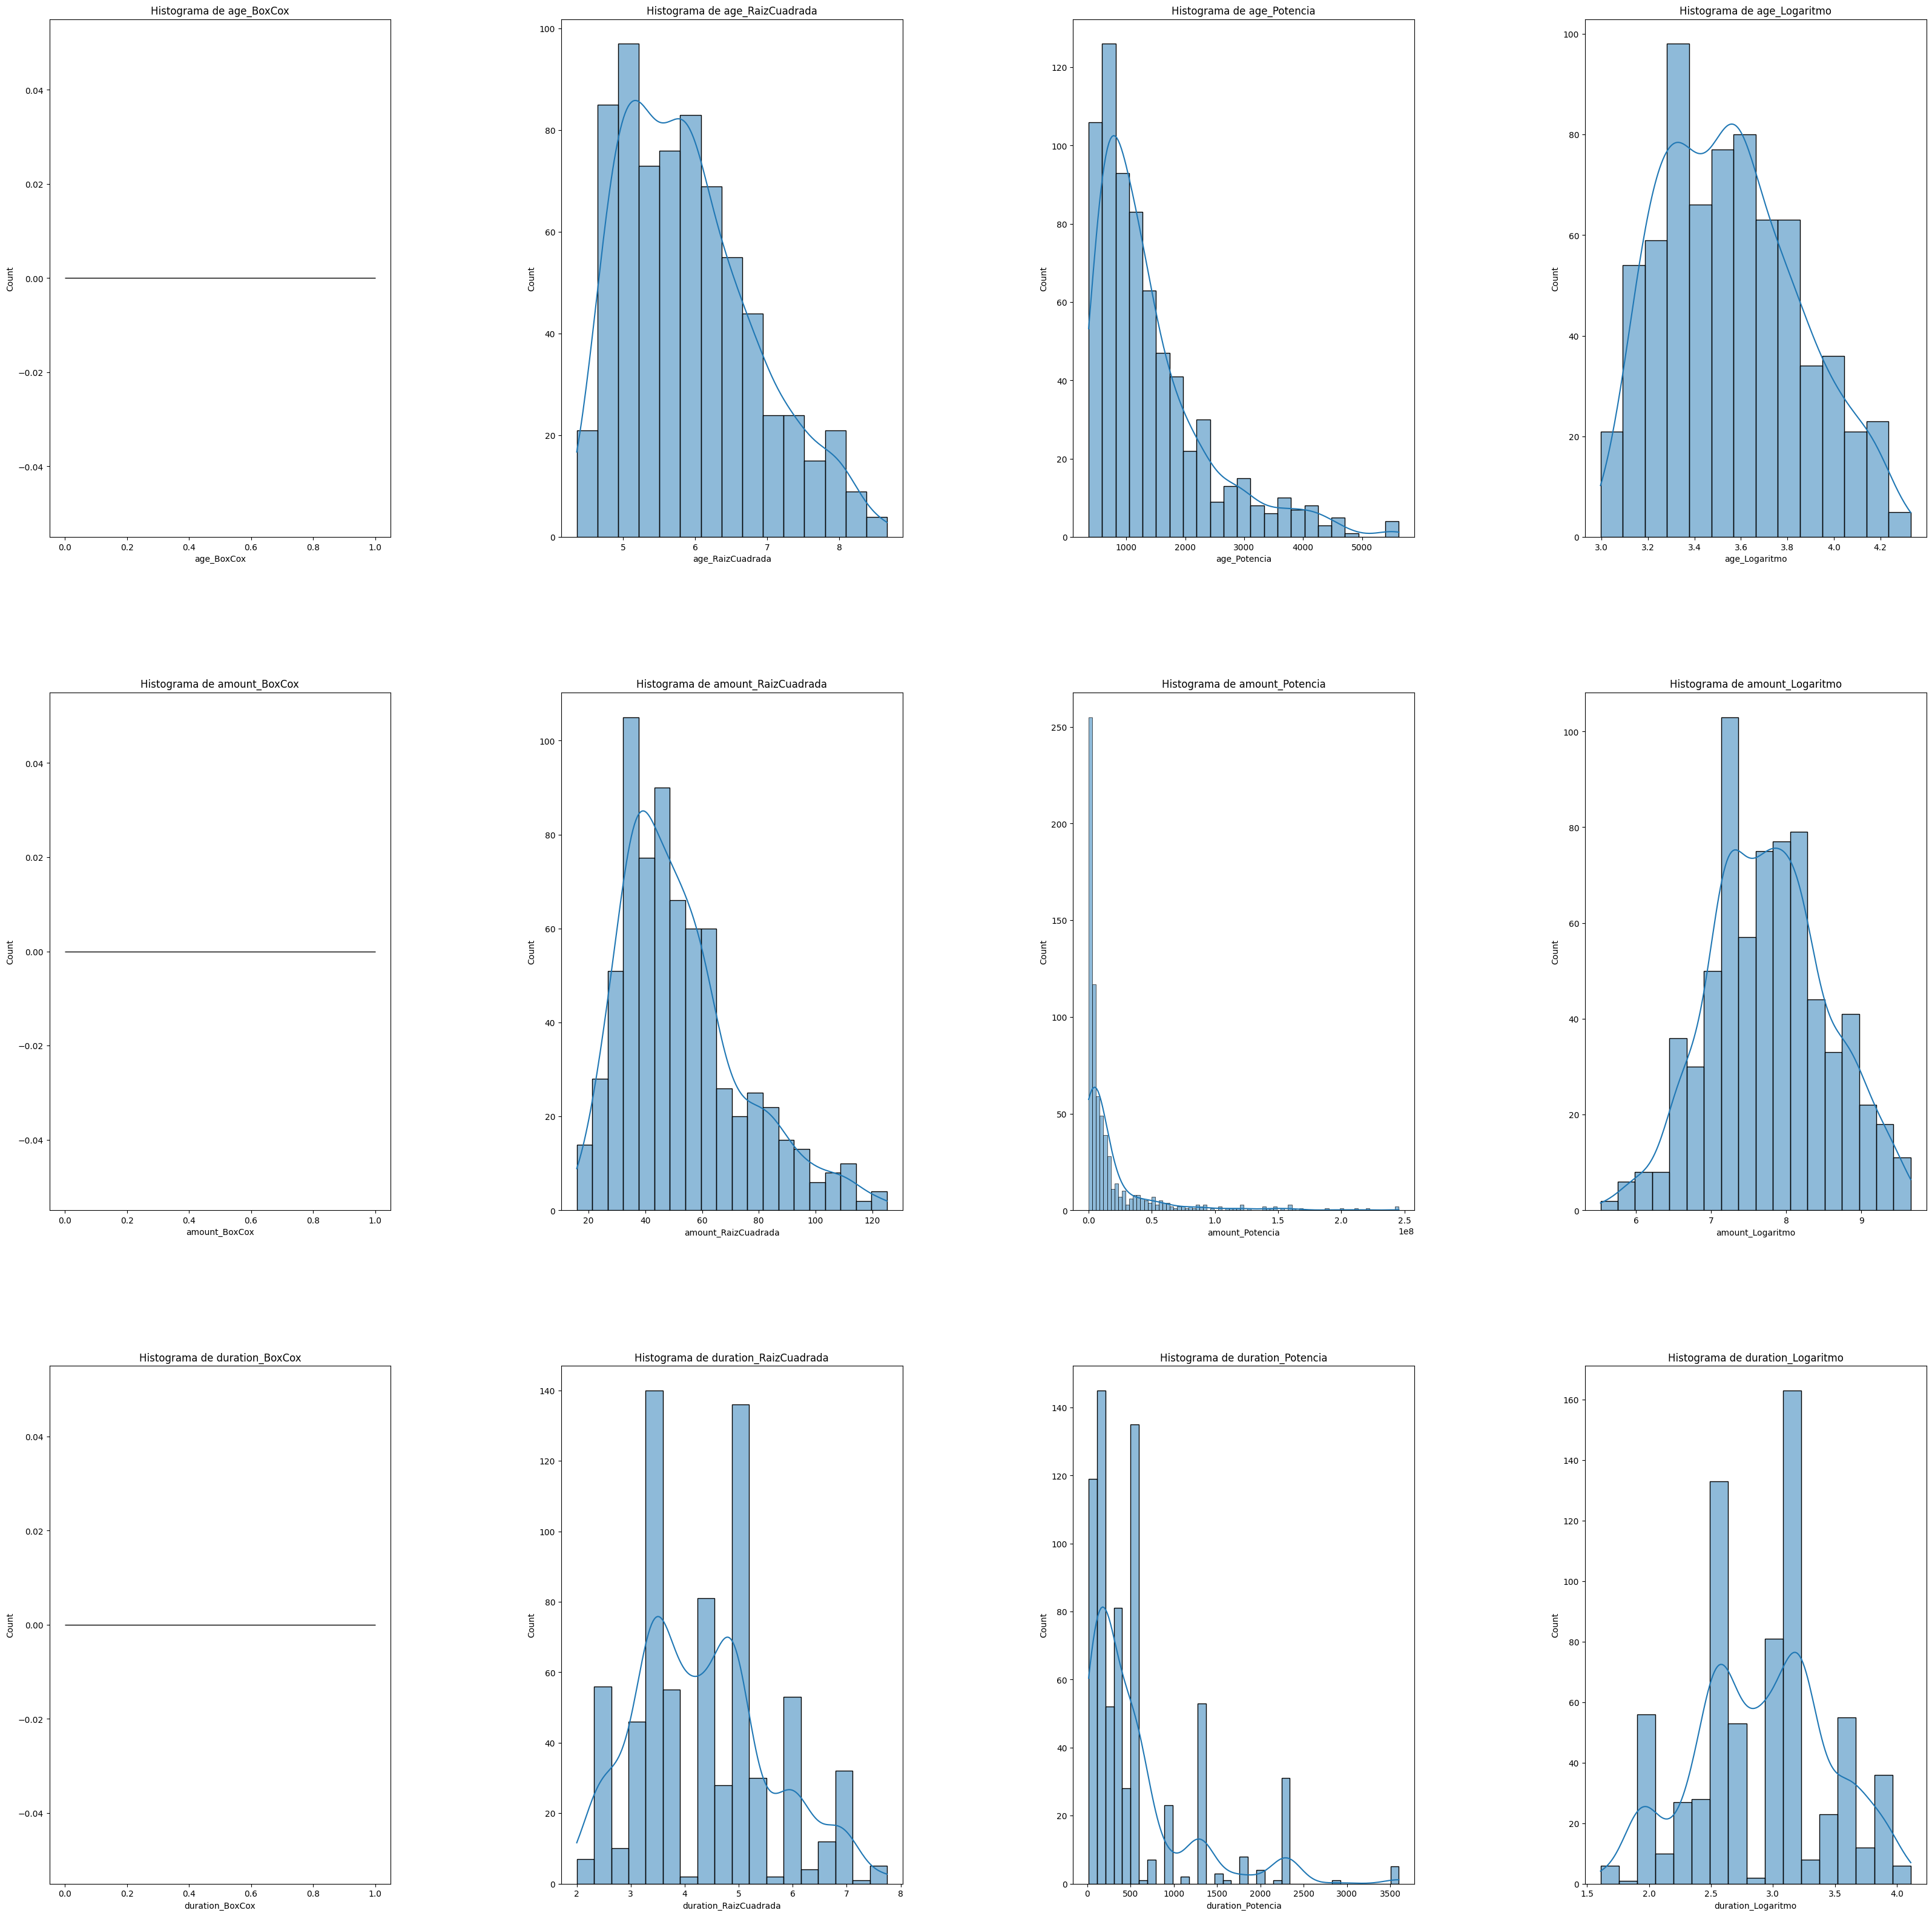

In [ ]:
df_transformed = pd.DataFrame()
numerical = ['age','amount','duration']
Xtrain_numerical = corr[numerical]
for col in Xtrain_numerical.columns:
    # Transformación Box-Cox
    if (Xtrain_numerical[col] <= 0).any():  # Verificar que no haya ceros o valores negativos
        transformed_data_boxcox = boxcox(Xtrain_numerical[col] + 1)
        df_transformed[f'{col}_BoxCox'] = transformed_data_boxcox
    else:
        df_transformed[f'{col}_BoxCox'] = np.nan

    # Transformación Raíz Cuadrada
    df_transformed[f'{col}_RaizCuadrada'] = np.sqrt(Xtrain_numerical[col])

    # Transformación Potencia
    df_transformed[f'{col}_Potencia'] = np.power(Xtrain_numerical[col], 2)

    # Transformación Logaritmo
    df_transformed[f'{col}_Logaritmo'] = np.log(Xtrain_numerical[col] + 1)

# Graficar histogramas de cada transformación
num_plots = len(df_transformed.columns)
num_cols = 4  # Cambiar a 3 columnas para acomodar los 5 subgráficos
num_rows = (num_plots + num_cols - 1) // num_cols  # Calcular el número de filas necesario
plt.figure(figsize=(40, 40))
plt.subplots_adjust(wspace=0.5,hspace=0.3)
for i, col in enumerate(df_transformed.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(df_transformed[col], kde=True)
    plt.title(f'Histograma de {col}')
plt.show()





*   Para las variables numericas decidí aplicar la transformacion de logaritmo ya que en esa tengo una mejor distribucion de los datos.
*   para las categoricas usare una transformacion one hot encoding para obtener valores ideales para procesar en el modelo.





# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

In [ ]:
# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:


# Variables numéricas:
num_pipe = Pipeline(steps = [           ( 'log', FunctionTransformer(np.log)),
                                        ('scaler', StandardScaler())
                                        ])

num_pipe_nombres = numerical


# Variables categóricas:
cat_pipe = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                       ])

cat = df.columns.drop(numerical)
cat_pipe_nombres = cat.drop('credit_risk')


# Conjuntemos las transformaciones de todo tipo de variable y en dado caso
# deja inaletardas aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer(
    transformers=[
        ('cat', cat_pipe, cat_pipe_nombres),
        ('num', num_pipe, num_pipe_nombres)
    ],
    remainder='passthrough')





In [ ]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo aumentado que llamaremos trainval para utilizar como entrenamiento:


Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainval = pd.concat([ytrain, yval], axis=0)



print(Xtrainval.shape, ytrainval.shape)

(850, 20) (850,)


In [ ]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Por el momento todas tienen sus argumentos predeterminados, pero deberás
# ajustarlos de manera que todos los modelos converjan durante el entrenamiento
# y puedas comparar cuál o cuáles de ellos son los mejores modelos.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
def mis_modelos():
  modelos, nombres = list(), list()




  # Regresión Logística:
  modelos.append(LogisticRegression(class_weight='balanced' ))
  nombres.append('LR')

  # k-Vecinos más Cercanos:
  modelos.append(KNeighborsClassifier( n_neighbors=5))
  nombres.append('kNN')

  # Árbol de decisiones:
  modelos.append(DecisionTreeClassifier(max_depth=5 ))
  nombres.append('DTree')

  # Bosque Aleatorio:
  modelos.append(RandomForestClassifier( n_estimators=100, max_depth=5))
  nombres.append('RF')

  # XGBoosting:
  modelos.append(XGBClassifier( learning_rate=0.1, n_estimators=100, max_depth=3))
  nombres.append('XGBoost')

  # Red neuronal de Perceptrón Multicapa:
  modelos.append(MLPClassifier( hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=2000 ))
  nombres.append('MLP')

  # Máquina de Vectores de Soporte:
  modelos.append(SVC( C=1.0 ))
  nombres.append('SVM')



  return modelos, nombres






# Entrenemos cada uno de los modelos y desplegamos la métricas de Train y Val.


modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

>> LR
	 test_f1 0.584 (0.054)
	 train_f1 0.655 (0.013)
	 test_recall 0.702 (0.069)
	 train_recall 0.783 (0.014)
	 test_accuracy 0.708 (0.037)
	 train_accuracy 0.760 (0.010)
	 test_precision 0.500 (0.046)
	 train_precision 0.564 (0.013)
	 test_roc_auc 0.765 (0.046)
	 train_roc_auc 0.839 (0.010)
>> kNN
	 test_f1 0.428 (0.065)
	 train_f1 0.617 (0.027)
	 test_recall 0.344 (0.067)
	 train_recall 0.509 (0.030)
	 test_accuracy 0.734 (0.031)
	 train_accuracy 0.816 (0.011)
	 test_precision 0.584 (0.096)
	 train_precision 0.785 (0.030)
	 test_roc_auc 0.703 (0.037)
	 train_roc_auc 0.883 (0.011)
>> DTree
	 test_f1 0.287 (0.122)
	 train_f1 0.523 (0.071)
	 test_recall 0.218 (0.128)
	 train_recall 0.393 (0.107)
	 test_accuracy 0.711 (0.021)
	 train_accuracy 0.798 (0.011)
	 test_precision 0.500 (0.102)
	 train_precision 0.848 (0.078)
	 test_roc_auc 0.706 (0.026)
	 train_roc_auc 0.846 (0.010)
>> RF
	 test_f1 0.215 (0.058)
	 train_f1 0.434 (0.034)
	 test_recall 0.125 (0.037)
	 train_recall 0.278 (0.028)



a.   ¿Qué error se considera más costoso por parte del banco? ¿FP o FN?

el FN ya que es mas costoso para el banco que el modelo saque un cliente bueno cuando en realidad es malo, esto supone mucho riesgo para el banco.  

b.   ¿Cuál o cuál serían entonces las métricas a considerar como más importantes?

recall ya que al mejorar estas nos indican que el modelo evita muy bien los falsos positivos y se maneja de forma aceptable los falsos negativos.

c.   Investiga qué otras métricas se pudieran considerar, de la gran familia de métricas que existen.

 el puntaje fbeta nos ayuda a medir relaciones entre precission y recall que tambien seria muy util.




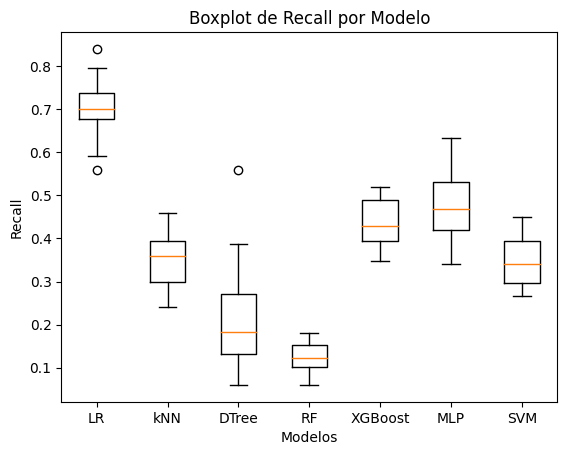

In [ ]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# utilizando los resultados obtenidos con la métrica que consideraste más importante
# en el ejercicio anterior:


def plot_recall_boxplot(resultados, nombres, model = None):
    # Recuperamos los valores de recall de cada modelo
    recall_values = []
    for i in range(len(resultados)):
        recall_values.append(resultados[i]['test_recall'])

    # Creamos el boxplot
    if (len(nombres) == len(recall_values)):
        plt.boxplot(recall_values, labels=nombres)
    elif (model != None):
        plt.boxplot(recall_values, labels=[nombres[nombres.index(model)]])
    else:
        plt.boxplot(recall_values, labels=[model])
    plt.xlabel('Modelos')
    plt.ylabel('Recall')
    plt.title('Boxplot de Recall por Modelo')
    plt.show()

plot_recall_boxplot(resultados, nombres)



# **Parte III: Modelos con técnicas para clases no balanceadas.**

## **Ejercicio 11**

In [ ]:
# Selecciona una técnica de sobremuestreo, submuestreo o sobremuestreo+submuestreo para
# clases no balanceadas que consideres adecuada, en combinación con los tres mejores modelos
# de la Parte II, para entrenar y desplegar todas las métricas que se desplegaron en la Parte II.

from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
Xtrainvalres, ytrainvalres = smote_enn.fit_resample(Xtrainval, ytrainval)

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainvalres,
                          ytrainvalres,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))




>> LR
	 test_f1 0.819 (0.042)
	 train_f1 0.891 (0.015)
	 test_recall 0.818 (0.053)
	 train_recall 0.878 (0.015)
	 test_accuracy 0.804 (0.046)
	 train_accuracy 0.884 (0.016)
	 test_precision 0.823 (0.051)
	 train_precision 0.905 (0.017)
	 test_roc_auc 0.896 (0.029)
	 train_roc_auc 0.956 (0.005)
>> kNN
	 test_f1 0.858 (0.036)
	 train_f1 0.917 (0.009)
	 test_recall 0.864 (0.061)
	 train_recall 0.931 (0.014)
	 test_accuracy 0.845 (0.038)
	 train_accuracy 0.909 (0.010)
	 test_precision 0.856 (0.051)
	 train_precision 0.904 (0.013)
	 test_roc_auc 0.908 (0.041)
	 train_roc_auc 0.962 (0.006)
>> DTree
	 test_f1 0.848 (0.038)
	 train_f1 0.921 (0.014)
	 test_recall 0.837 (0.050)
	 train_recall 0.909 (0.030)
	 test_accuracy 0.836 (0.044)
	 train_accuracy 0.915 (0.015)
	 test_precision 0.863 (0.064)
	 train_precision 0.935 (0.034)
	 test_roc_auc 0.880 (0.056)
	 train_roc_auc 0.969 (0.013)
>> RF
	 test_f1 0.860 (0.041)
	 train_f1 0.933 (0.009)
	 test_recall 0.908 (0.042)
	 train_recall 0.961 (0.008)

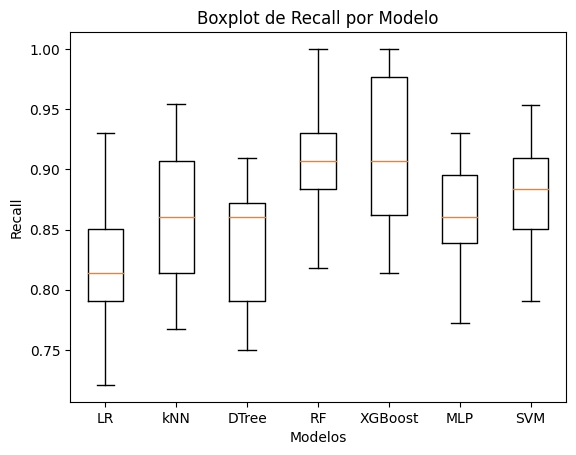

In [ ]:
plot_recall_boxplot(resultados, nombres)

# **Parte IV: Mejor modelo**



El mejor modelo segun el parametro optimo para el ejercicio es XGboost ya que obtenemos un recall mas alto que en el resto de modelos



In [ ]:

from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m',XGBClassifier() )])

    # Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'm__learning_rate': [0.01, 0.1, 0.2],
    'm__n_estimators': [100, 200, 300],
    'm__objective': ['binary:logistic']

}  # Aquí define los parámetros específicos para cada modelo

    # Aplicar GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, scoring='recall', cv=micv)
grid_search.fit(Xtrainvalres, ytrainvalres)

    # Obtener los resultados de validación cruzada
best_recall_score = grid_search.best_score_
best_params = grid_search.best_params_

# Imprimir la mejor métrica de recall, accuracy, f1-score, precisión y los mejores hiperparámetros
print("Mejor métrica de recall:", best_recall_score)
print("Mejores hiperparámetros:", best_params)
# *********** Aquí termina la sección de agregar código *************


Mejor métrica de recall: 0.913706835799859
Mejores hiperparámetros: {'m__learning_rate': 0.1, 'm__n_estimators': 300, 'm__objective': 'binary:logistic'}


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
Xtestres, ytestres = smote_enn.fit_resample(Xtest, ytest)
best_pipeline = Pipeline(steps=[
    ('ct', columnasTransformer),
    ('m', XGBClassifier(
      learning_rate=best_params['m__learning_rate'],
        n_estimators=best_params['m__n_estimators'],
        objective='binary:logistic'
    ))
])

# Entrenar el pipeline con los datos de entrenamiento
best_pipeline.fit(Xtrainvalres, ytrainvalres)

# Predecir utilizando el conjunto de prueba
y_pred = best_pipeline.predict(Xtestres)

# Calcular las métricas en el conjunto de prueba
accuracy = accuracy_score(ytestres, y_pred)
precision = precision_score(ytestres, y_pred)
recall = recall_score(ytestres, y_pred)
f1 = f1_score(ytestres, y_pred)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.6666666666666666
Precision: 0.7333333333333333
Recall: 0.55
F1 Score: 0.6285714285714286


In [ ]:
# b.	Obtener la matriz de confusión.

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(ytestres, y_pred)

# Imprime la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[15  4]
 [ 9 11]]


In [ ]:

from sklearn.inspection import permutation_importance

result = permutation_importance(best_pipeline, Xtestres, ytestres, scoring='f1_weighted', n_repeats=10, random_state=42)
importance = result.importances_mean
feature_names = Xtest.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Los factores más importantes para la rotación de personal son:")
print(importance_df.head(10))

Los factores más importantes para la rotación de personal son:
                Feature  Importance
0                status    0.206080
4                amount    0.069561
1              duration    0.033357
6   employment_duration    0.010256
12                  age    0.000000
18            telephone    0.000000
17        people_liable    0.000000
16                  job    0.000000
15       number_credits    0.000000
14              housing    0.000000


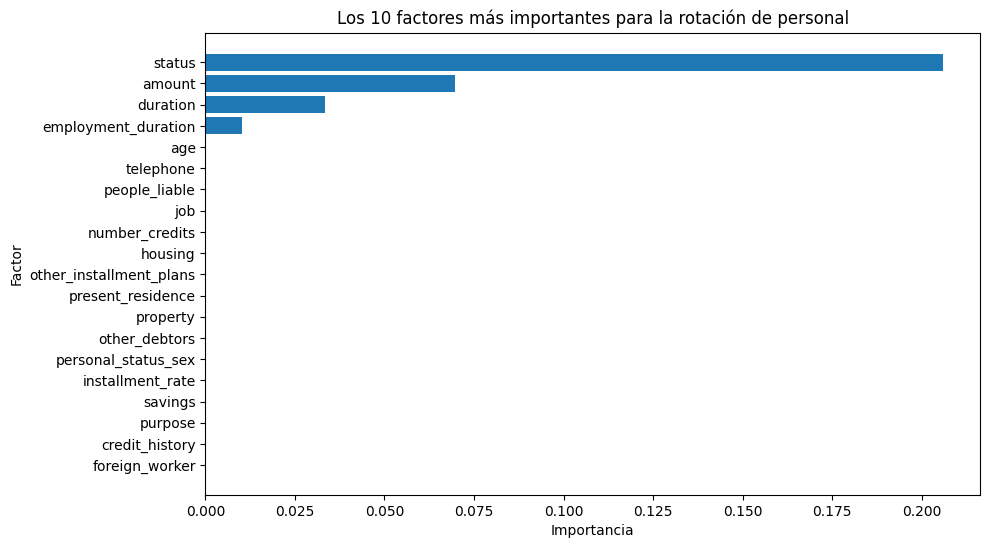

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Factor')
plt.title('Los 10 factores más importantes para la rotación de personal')
plt.gca().invert_yaxis()
plt.show()

CONCLUSION

Se encontro el mejor modelo con XGboost, con los hiperparametros ajustados logro mejorar en el entrenamiento sin embargo en la prueba no alcanzo un nivel tan alto como lo esperado dado el entrenamiento. Se corrigio y se logro al mejor rendimiento en esta manera. Dentro del articulo IEEE coincido en que al utilizar el sampling SMOTE mejoran mucho los valores de rendimiento del modelo.

